<a href="https://colab.research.google.com/github/SaranyaSajeesh/SMS_SPAM-DETECTION/blob/main/NLP_SMS_SPAM_DETECTIONdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd


In [7]:
df1=pd.read_csv('/content/SMS_train.csv',encoding='ISO-8859-1')
df1

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [8]:
df2=pd.read_csv('/content/SMS_test.csv',encoding='ISO-8859-1')
df2

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [9]:
df=pd.concat([df1,df2],axis=0,ignore_index=True)
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
1077,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,122,Try to do something dear. You read something f...,Non-Spam
1079,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [10]:
df.drop(['S. No.'],axis=1,inplace=True)
df

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,Try to do something dear. You read something f...,Non-Spam
1079,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [11]:
df['Label']=df['Label'].map({'Non-Spam':0,'Spam':1})

In [12]:
df['Label'].value_counts()

0    884
1    198
Name: Label, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

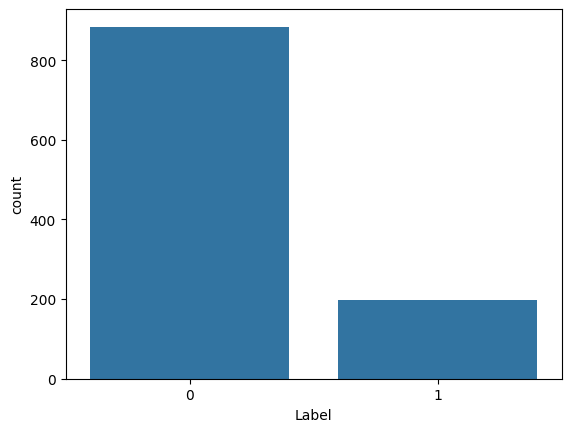

In [13]:
import seaborn as sns
sns.countplot(x='Label',data=df)

In [14]:
msg=df.Message_body
msg

0                              Rofl. Its true to its name
1       The guy did some bitching but I acted like i'd...
2       Pity, * was in mood for that. So...any other s...
3                    Will ü b going to esplanade fr home?
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear. You read something f...
1079    Sun ah... Thk mayb can if dun have anythin on....
1080    SYMPTOMS when U are in love: "1.U like listeni...
1081    Great. Have a safe trip. Dont panic surrender ...
Name: Message_body, Length: 1082, dtype: object

In [15]:
msg=msg.str.replace('[^a-zA-Z0-9]+'," ")
msg

<ipython-input-15-53af49f42db0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  msg=msg.str.replace('[^a-zA-Z0-9]+'," ")


0                               Rofl Its true to its name
1       The guy did some bitching but I acted like i d...
2       Pity was in mood for that So any other suggest...
3                      Will b going to esplanade fr home 
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear You read something fo...
1079    Sun ah Thk mayb can if dun have anythin on Thk...
1080    SYMPTOMS when U are in love 1 U like listening...
1081     Great Have a safe trip Dont panic surrender all 
Name: Message_body, Length: 1082, dtype: object

In [16]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
msg=msg.apply(lambda x:[stemmer.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda x:' '.join(x))
msg


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0                                 rofl it true to it name
1       the guy did some bitch but i act like i d be i...
2          piti was in mood for that so ani other suggest
3                           will b go to esplanad fr home
4       this is the 2nd time we have tri 2 contact u u...
                              ...                        
1077    7 wonder in my world 7th you 6th ur style 5th ...
1078       tri to do someth dear you read someth for exam
1079    sun ah thk mayb can if dun have anythin on thk...
1080    symptom when u are in love 1 u like listen son...
1081        great have a safe trip dont panic surrend all
Name: Message_body, Length: 1082, dtype: object

In [17]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words('english')
msg=msg.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
msg

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0                                          rofl true name
1       guy bitch act like interest buy someth els nex...
2                                   piti mood ani suggest
3                                   b go esplanad fr home
4       2nd time tri 2 contact u u 750 pound prize 2 c...
                              ...                        
1077    7 wonder world 7th 6th ur style 5th ur smile 4...
1078                     tri someth dear read someth exam
1079    sun ah thk mayb dun anythin thk book e lesson ...
1080    symptom u love 1 u like listen song 2 u get st...
1081                   great safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

In [18]:
msg=msg.apply(lambda x:[i for i in word_tokenize(x) if len(i)>=3]).apply(lambda x:' '.join(x))
msg

0                                          rofl true name
1       guy bitch act like interest buy someth els nex...
2                                   piti mood ani suggest
3                                           esplanad home
4       2nd time tri contact 750 pound prize claim eas...
                              ...                        
1077    wonder world 7th 6th style 5th smile 4th perso...
1078                     tri someth dear read someth exam
1079    sun thk mayb dun anythin thk book lesson pilat...
1080    symptom love like listen song get stop see nam...
1081                   great safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(msg)
print(X)

  (0, 1749)	0.5086856793431559
  (0, 2611)	0.5352804139572925
  (0, 2151)	0.6743246681420617
  (1, 1117)	0.1977601804079742
  (1, 1162)	0.32809784984076795
  (1, 2748)	0.22799692523276513
  (1, 1781)	0.26514476216742267
  (1, 966)	0.30392006451010634
  (1, 2337)	0.2751324774651613
  (1, 616)	0.2751324774651613
  (1, 1388)	0.3187189191538061
  (1, 1530)	0.2174075457753962
  (1, 332)	0.35437558793533497
  (1, 541)	0.3752334020731641
  (1, 1232)	0.26826339572857744
  (2, 2436)	0.5165656915002457
  (2, 400)	0.36716239650585775
  (2, 1706)	0.5469696796701571
  (2, 1932)	0.5469696796701571
  (3, 1305)	0.5461172911588754
  (3, 993)	0.8377087228251189
  (4, 2065)	0.235533135363796
  (4, 1758)	0.2730067862368853
  (4, 1672)	0.2433372454072742
  (4, 1904)	0.23925757899516012
  :	:
  (1079, 1855)	0.2706898396742334
  (1079, 1722)	0.2706898396742334
  (1079, 2442)	0.26153957460502464
  (1079, 1519)	0.24774213284441401
  (1079, 562)	0.2374366876682329
  (1079, 2532)	0.49548426568882803
  (1079, 164

In [20]:
X.shape

(1082, 2861)

In [21]:
X=X.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
y=df['Label']
y

0       0
1       0
2       0
3       0
4       1
       ..
1077    0
1078    0
1079    0
1080    0
1081    0
Name: Label, Length: 1082, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

knn=KNeighborsClassifier(n_neighbors=3)
sv=SVC()
rf=RandomForestClassifier(random_state=1)
models=[knn,sv,rf]
for model in models:
  print("_"*50,model,"_"*50)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  nw=vectorizer.transform(['Rofl. Its true to its name'])
  nw=nw.toarray()
  y=model.predict(nw)
  if y==0:
    print('Nonspam')
  else:
    print('Spam')


__________________________________________________ KNeighborsClassifier(n_neighbors=3) __________________________________________________
              precision    recall  f1-score   support

           0       0.83      1.00      0.90       260
           1       1.00      0.15      0.27        65

    accuracy                           0.83       325
   macro avg       0.91      0.58      0.59       325
weighted avg       0.86      0.83      0.78       325

Nonspam
__________________________________________________ SVC() __________________________________________________
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       260
           1       0.97      0.45      0.61        65

    accuracy                           0.89       325
   macro avg       0.92      0.72      0.77       325
weighted avg       0.90      0.89      0.87       325

Nonspam
__________________________________________________ RandomForestClassifier(random_sta